### This notebook includes visualizations as the followings:

- ##### A line plot of the temperatures for 2022 plotted as time series.

- ##### A bar chart of the top 20 starting stations frequencies. 

- ##### A dual-axis line plot of bike trip counts and temperatures.

- ##### A box plot of of trip duration by user type.

- ##### A facetGrid analysis - trip duration by user type and rideable_type.


### Importing libraries and dataset

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# The dataset is large, so it was saved as a pickle file for faster loading.

df = pd.read_pickle("merged_Bike_data.pkl")

### Data preprocessing

In [3]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [4]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

In [5]:
df.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name       49
start_station_id         49
end_station_name      69884
end_station_id        69884
start_lat                 0
start_lng                 0
end_lat               37223
end_lng               37223
member_casual             0
date                      0
avgTemp                   0
dtype: int64

In [6]:
df_clean = df.dropna()

### Visualizations

In [28]:
# Set a global theme and color palette
sns.set_theme(style="ticks", palette= "Blues_r")
sns.set_style("dark")

- #### A line plot of the temperatures for 2022 plotted as time series.

In [8]:
# Setting the "date" as the index

df = df_clean.set_index('date')

In [9]:
# Keep only the first entry for each day, since multiple rides on the same day have the same temperature

daily_temp = df[~df.index.duplicated(keep='first')].sort_index()

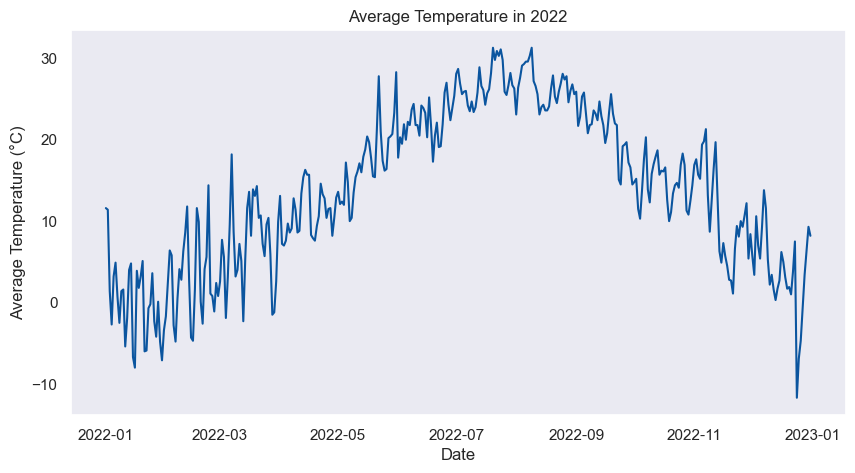

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(x=daily_temp.index, y="avgTemp", data=daily_temp)

plt.title("Average Temperature in 2022")
plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")
plt.show()

- #### A bar chart of the top 20 starting stations frequencies.

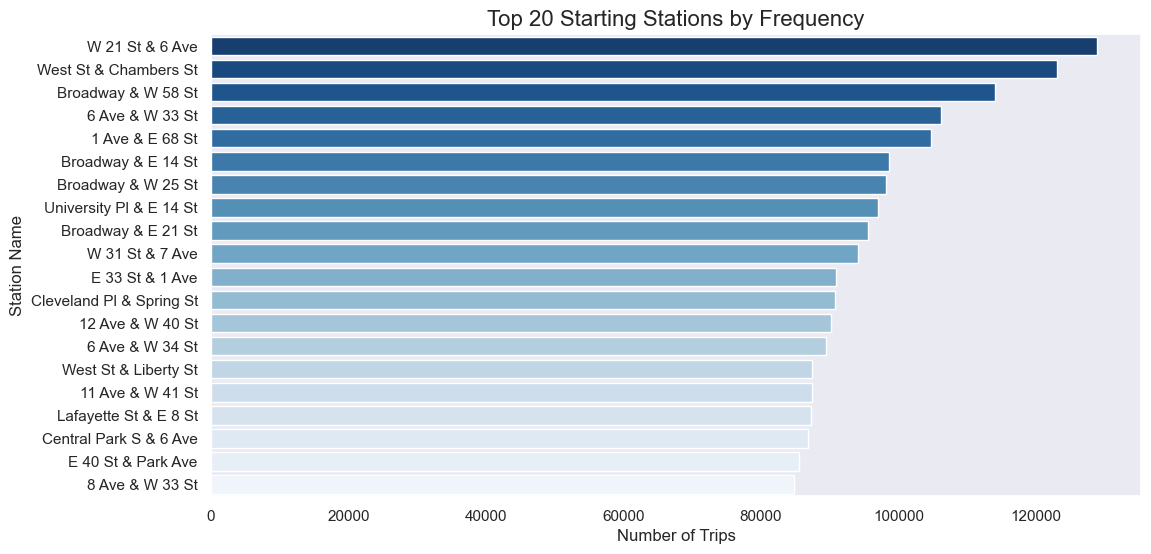

In [20]:
# Get top 20 starting stations
top20_stations = df['start_station_name'].value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=top20_stations.values, y=top20_stations.index, palette=("Blues_r"))

plt.title("Top 20 Starting Stations by Frequency", fontsize=16)
plt.xlabel("Number of Trips")
plt.ylabel("Station Name")
plt.show()

- #### A dual-axis line plot of bike trip counts and temperatures

In [3]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [4]:
df_group.head()

,date,ride_id
0,2022-01-01,20428
1,2022-01-02,43009
2,2022-01-03,33189
3,2022-01-04,36842
4,2022-01-05,34230


In [5]:
# Rename the column to 'bike_rides_daily'

df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)

In [6]:
# Merge the created dataframe to the main dataframe

df = df.merge(df_group, on = "date", how = 'outer', indicator = True)

In [7]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')

In [8]:
# Drop the column '_merge'

df.drop(columns = {'_merge'}, inplace = True)

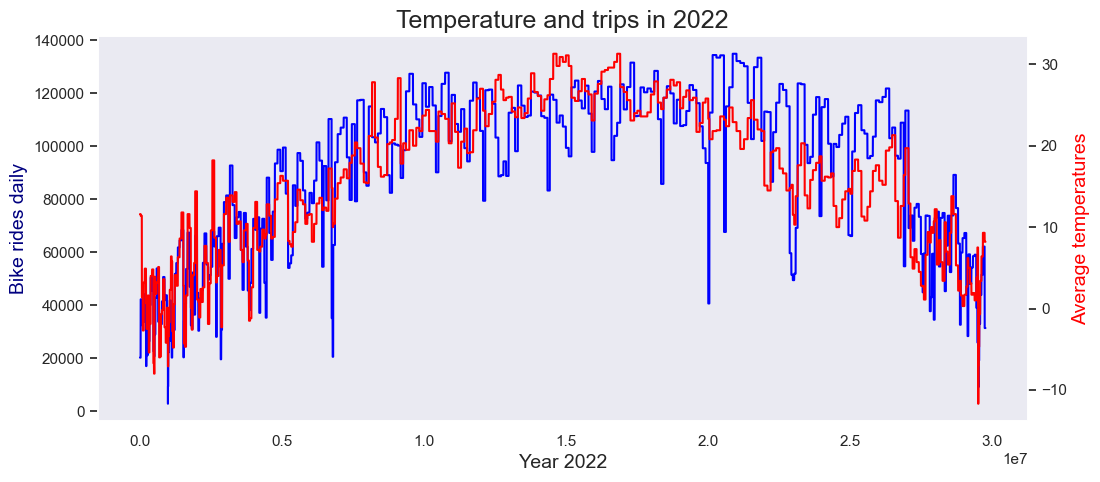

In [19]:
fig,ax = plt.subplots(figsize=(12, 5))

sns.lineplot(data = df['bike_rides_daily'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = df['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()


- #### A box plot of of trip duration by user type.


In [20]:
df.columns

Index(['date', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily'],
      dtype='object')

In [21]:
df['member_casual']

0           member
1           member
2           member
3           member
4           member
             ...  
29768277    member
29768278    member
29768279    member
29768280    member
29768281    member
Name: member_casual, Length: 29768282, dtype: object

In [22]:
# rename the column

df.rename(columns={"member_casual": "user_type"}, inplace=True)

In [23]:
# Ensure columns are datetime

df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [24]:
# Calculate trip duration in minutes

df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [25]:
df['trip_duration'].describe()

count    2.976828e+07
mean     1.601734e+01
std      2.473186e+02
min     -5.728892e+01
25%      5.788700e+00
50%      1.013900e+01
75%      1.792063e+01
max      4.044810e+05
Name: trip_duration, dtype: float64

The minimum tirp duration is -5 and the maximum duration is 404,481 min ≈ 281 days which are outliers.

In [34]:
# Keep only trips between 1 minute and 60 minutes

df_temp = df[(df['trip_duration'] >= 2) & (df['trip_duration'] <= 60)]

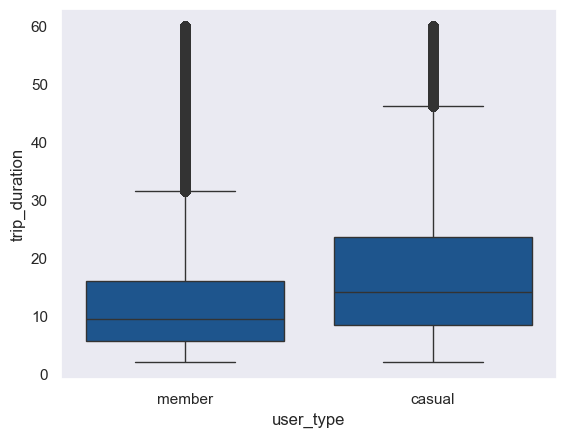

In [35]:
plt.figure()
sns.boxplot(x = 'user_type', y = 'trip_duration', data = df_temp)
plt.show()

The box plot shows the distribution of trip durations across the two user types: members and casual riders. 

- For the group of members, most trips fall within a narrow range, with the median duration around 10 minutes and the majority of rides below 30 minutes. 

- Compared to members, casual users tend to have slightly longer trip durations of nearly 50 minutes, as indicated by a higher median and wider interquartile range. There are outliers that appear above the whiskers, representing unusually long rides compared to the majority.

- Overall, this suggests that casual riders often use bikes for longer leisure trips, while members typically take shorter, more consistent rides.

- #### A facetGrid analysis - trip duration by user type and rideable_type.

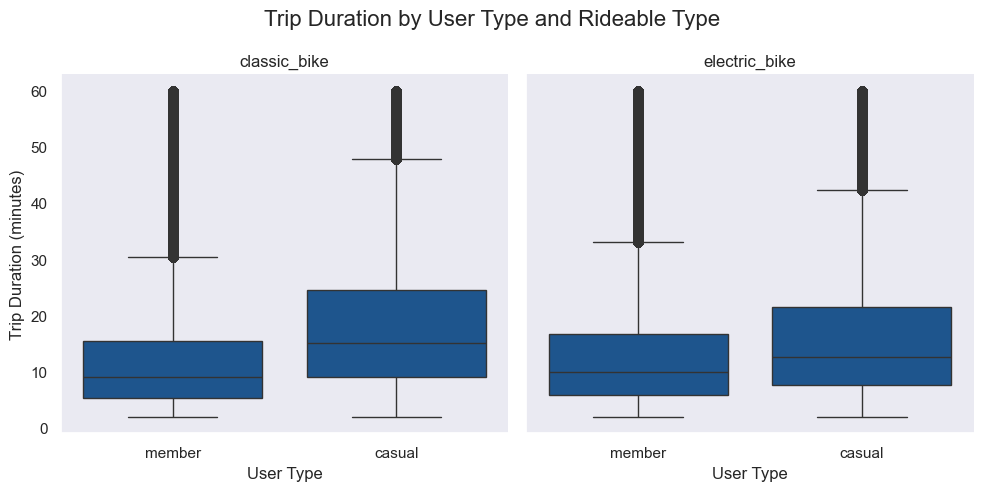

In [36]:
# Facet by user type and rideable type

# Facet by rideable_type
g = sns.FacetGrid(df_temp, col="rideable_type", height=5, aspect=1)

# Map boxplots: x=user_type, y=trip_duration
g.map_dataframe(sns.boxplot, x="user_type", y="trip_duration")

g.set_axis_labels("User Type", "Trip Duration (minutes)")
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Trip Duration by User Type and Rideable Type", fontsize=16)

plt.show()

The FacetGrid shows trip durations across user types, separated by bike type.

- Both classic bikes and electric bikes exhibit similar trip duration patterns: casual riders consistently take longer trips than members.

- Median trip durations: Electric bikes tend to have slightly lower median than classic bikes for casual riders.

- Spread of durations: Classic bikes have tighter distributions among members, reflecting more consistent trip behavior. In contrast, the same category of bikes show a wider spread of trip lengths for casual riders.

- Overall pattern: For both bike types, casual riders take longer trips than members, with higher medians and wider interquartile ranges.

In [9]:
df.to_pickle("cleaned_dataset.pkl")